In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_1 = pd.read_csv('data/exercise.csv')
df_2 = pd.read_csv('data/calories.csv')

In [9]:
df_1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df_2.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [44]:
# Объединим 2 набора данных в нужный нам датасет

df = pd.merge(df_1, df_2, how='outer')

In [17]:
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [18]:
df.shape

(15000, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [20]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


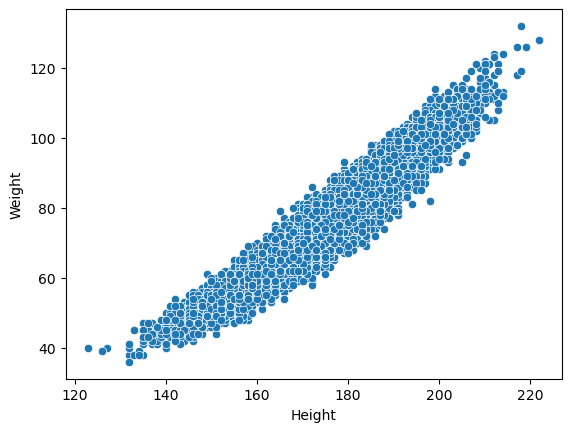

In [22]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

# Наблюдаем линейную зависимость между ростом и весом

In [26]:
features = df.iloc[:, 2:-1]
features

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,68,190.0,94.0,29.0,105.0,40.8
1,20,166.0,60.0,14.0,94.0,40.3
2,69,179.0,79.0,5.0,88.0,38.7
3,34,179.0,71.0,13.0,100.0,40.5
4,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4
14996,27,165.0,65.0,6.0,85.0,39.2
14997,43,159.0,58.0,16.0,90.0,40.1
14998,78,193.0,97.0,2.0,84.0,38.3


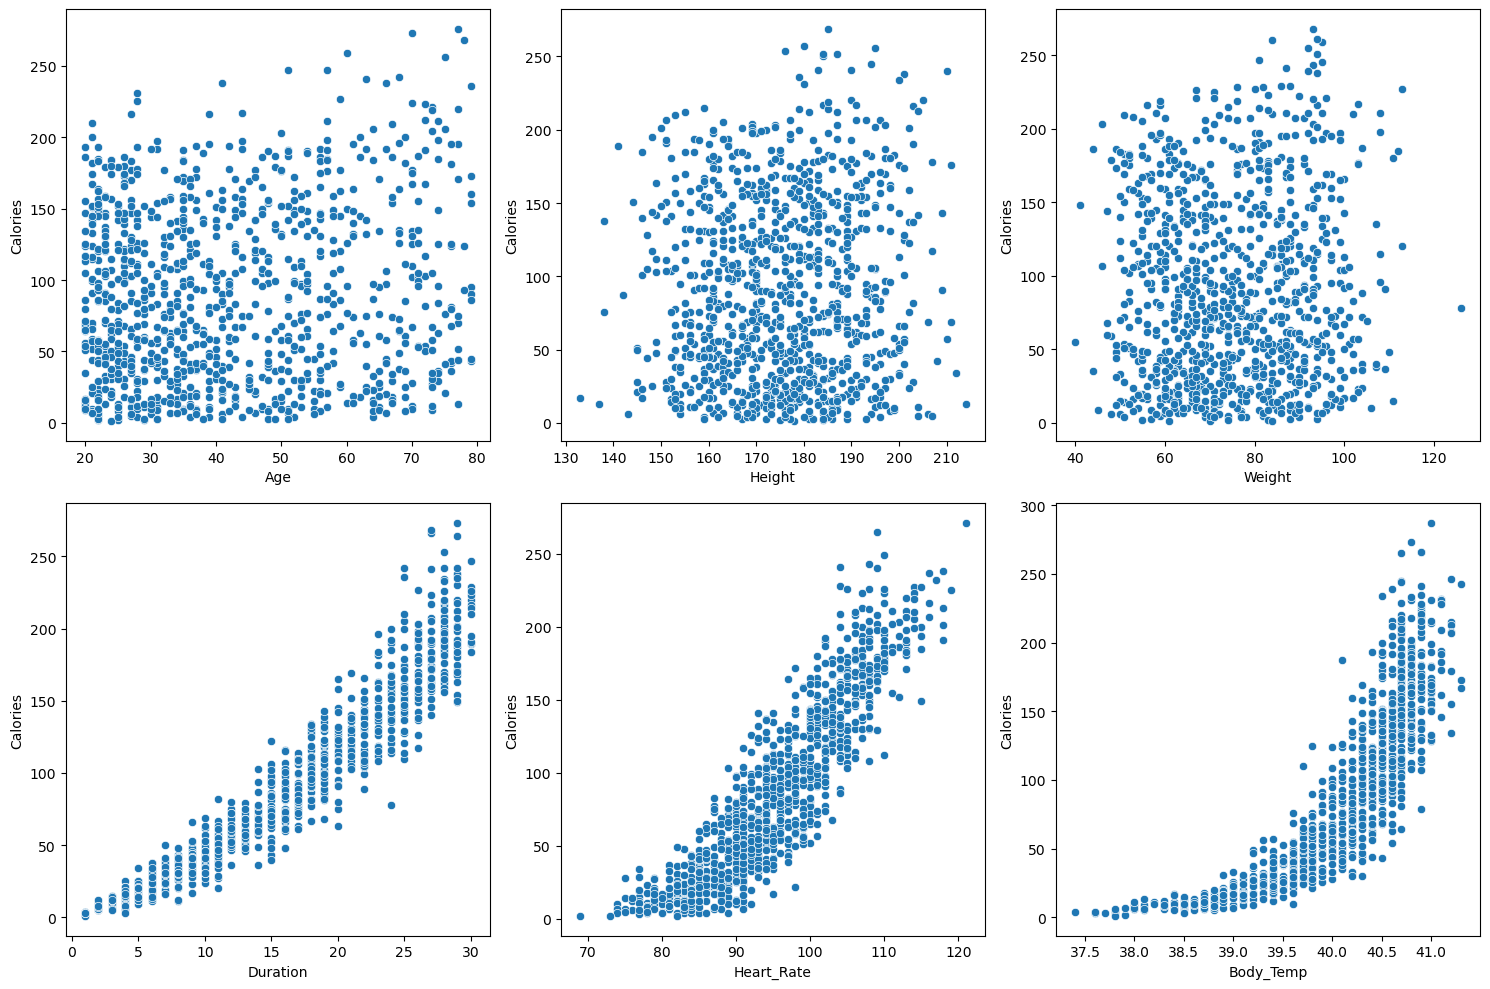

In [27]:
# Проанализируем связь калорий от остальных признаков

plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
    
plt.tight_layout()
plt.show()

# Особенно заметна связь Duration/Calories, Heart_Rate/Calories, Body_Temp/Calories

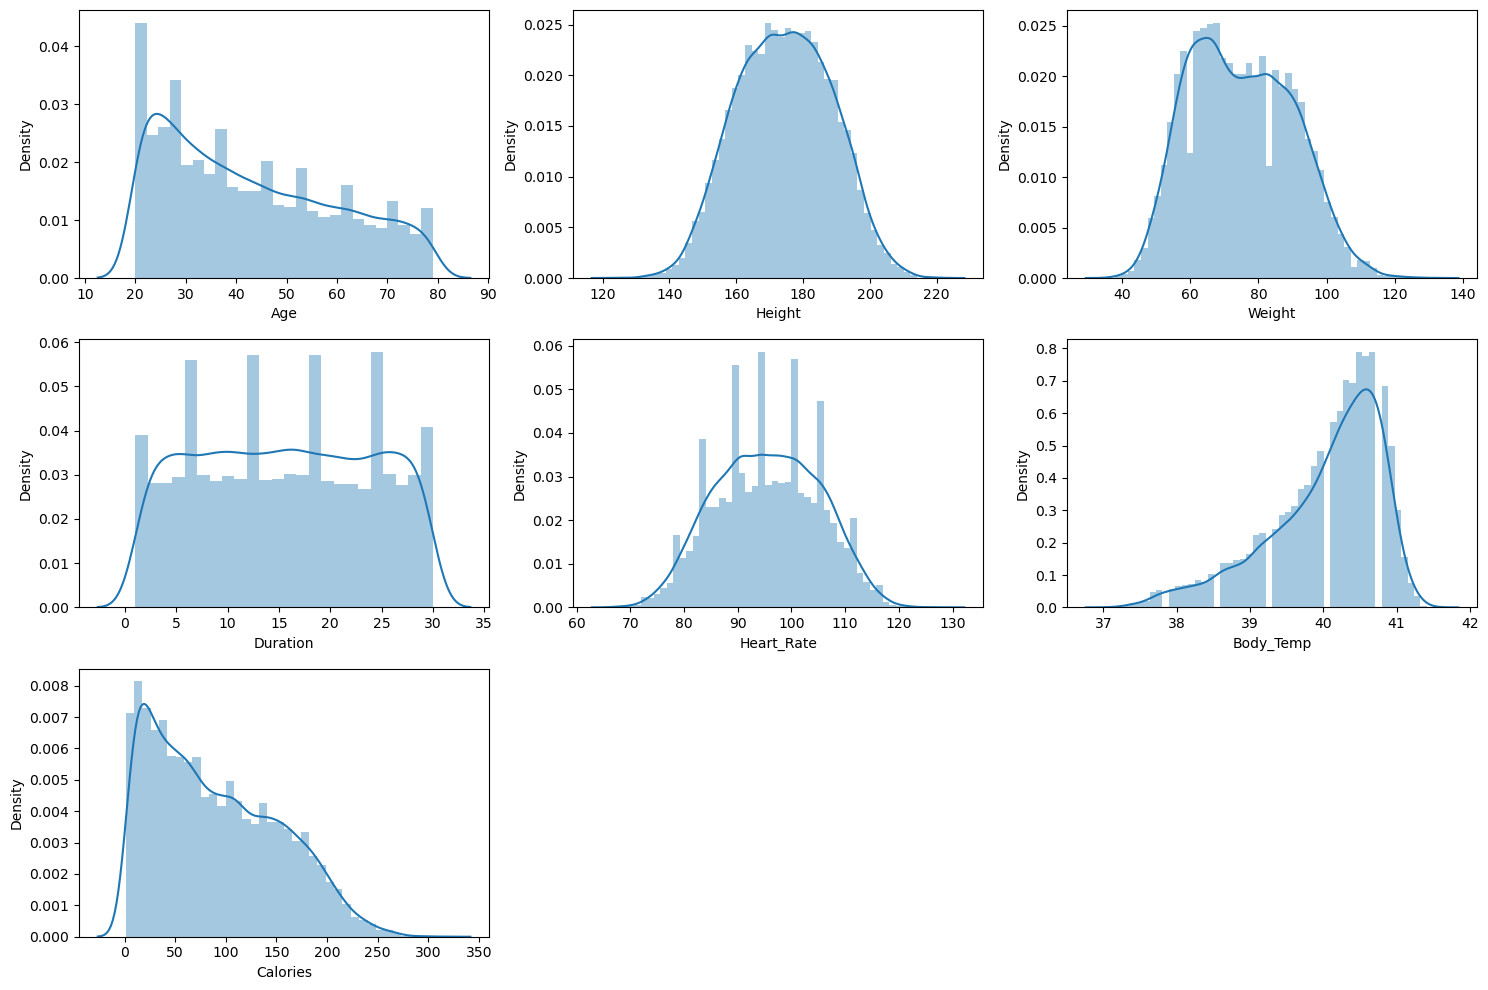

In [33]:
# Посмотрим распределения

features['Calories'] = df['Calories']

plt.subplots(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sb.distplot(df[col])
    
plt.tight_layout()
plt.show()

# В основном они близки к нормальным, крому Age, Body_Temp и Calories

In [47]:
# Заменим категориальные признаки в столбце Gender на числовые

df.replace({'male': 0, 'female': 1}, inplace=True)
df.head()

,User_ID,Gender,Age,Height,Body_Temp,Calories
0,14733363,0,68,190.0,40.8,231.0
1,14861698,1,20,166.0,40.3,66.0
2,11179863,0,69,179.0,38.7,26.0
3,16180408,1,34,179.0,40.5,71.0
4,17771927,1,27,154.0,39.8,35.0


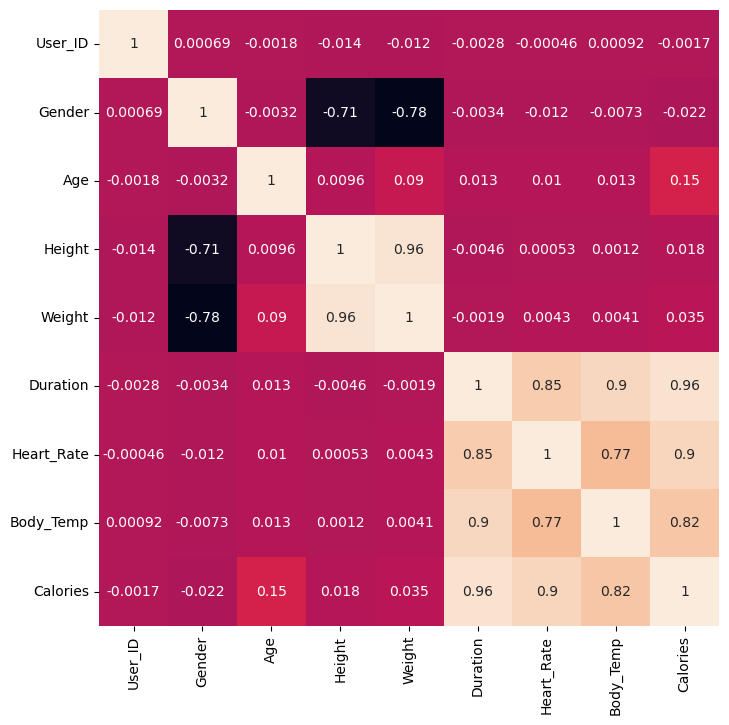

In [38]:
# Проверим корреляцию признаков

plt.figure(figsize=(8, 8))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

# Видим сильную корреляцию между столбцами Height и Weight, 
# а также между Duration, Heart_Rate и Body_Temp

# Calories - это целевой столбец

In [45]:
df.drop(['Weight', 'Duration', 'Heart_Rate'], axis=1, inplace=True)
df

,User_ID,Gender,Age,Height,Body_Temp,Calories
0,14733363,male,68,190.0,40.8,231.0
1,14861698,female,20,166.0,40.3,66.0
2,11179863,male,69,179.0,38.7,26.0
3,16180408,female,34,179.0,40.5,71.0
4,17771927,female,27,154.0,39.8,35.0
...,...,...,...,...,...,...
14995,15644082,female,20,193.0,40.4,45.0
14996,17212577,female,27,165.0,39.2,23.0
14997,17271188,female,43,159.0,40.1,75.0
14998,18643037,male,78,193.0,38.3,11.0


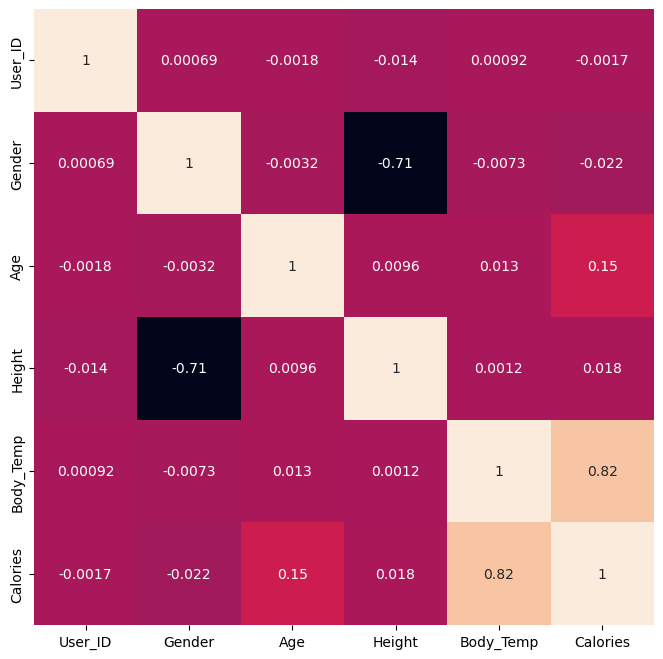

In [48]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr(), annot=True, cbar=False)
plt.show()

# Ситуация более менее

In [53]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories']

In [54]:
features.head()

,Gender,Age,Height,Body_Temp
0,0,68,190.0,40.8
1,1,20,166.0,40.3
2,0,69,179.0,38.7
3,1,34,179.0,40.5
4,1,27,154.0,39.8


In [55]:
target

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

### Перед нами задача регрессии

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((12000, 4), (3000, 4))

In [60]:
# Нормализуем данные для стабильного и быстрого обучения модели

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error as mae

# Используем MAE, так как распределение смещено 

models = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), XGBRegressor(), CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    loss_function='MAE',
    verbose=100
)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    
    print(f'{models[i]}: ')
    
    train_preds = models[i].predict(X_train)
    print(f'Ошибка на обучающей выборке: {mae(y_train, train_preds)}')
    
    test_preds = models[i].predict(X_test)
    print(f'Ошибка на тестовой выборке: {mae(y_test, test_preds)}')
    print()

LinearRegression(): 
Ошибка на обучающей выборке: 27.30126340088777
Ошибка на тестовой выборке: 28.122725995162508

Ridge(): 
Ошибка на обучающей выборке: 27.301377641640762
Ошибка на тестовой выборке: 28.122809618098486

Lasso(): 
Ошибка на обучающей выборке: 27.334224416377683
Ошибка на тестовой выборке: 28.11292469539926

SVR(): 
Ошибка на обучающей выборке: 19.11433392269662
Ошибка на тестовой выборке: 19.864210065527832

RandomForestRegressor(): 
Ошибка на обучающей выборке: 8.310577653439152
Ошибка на тестовой выборке: 20.94798314021164

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None,

### Лучшие результаты показывает CatBoost